In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from uncertainties import ufloat
import uncertainties.unumpy as unp
from scipy.optimize import curve_fit
import scipy.constants as const

No handles with labels found to put in legend.
a = 178.77863930 ± 22.88294181
b = 0.17341742 ± 0.05212717
RC= 0.0056+/-0.0007


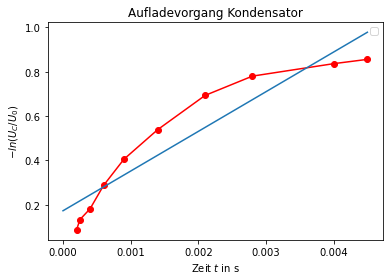

In [217]:
#Daten
t=[0.2,0.25,0.4,0.6,0.9,1.4,2.1,2.8,4.0,4.5]
t=[i * (1/1000) for i in t]
U=[1,1.5,2,3,4,5,6,6.5,6.8,6.9]
U=[j* (1/12) for j in U]

#Lineare Regression
X=[0]
y=0
Ulog=X*len(U)
while y <len(U):
    Ulog[y]=-1*np.log(1-U[y])
    y=y+1

params, covariance_matrix = np.polyfit( t,Ulog, deg=1, cov=True)

errors = np.sqrt(np.diag(covariance_matrix))

for name, value, error in zip('ab', params, errors):
    print(f'{name} = {value:.8f} ± {error:.8f}')
z=np.linspace(0,0.0045,50000)
#Plot
plt.plot(t,Ulog,'r-')
plt.plot(t,Ulog,'ro')
plt.plot(z,z*params[0]+params[1])
#plt.plot(z,8*(1-np.exp(-z/0.00186860)),label='Test')
#plt.yscale('log')
#plt.xscale('log')
plt.title('Aufladevorgang Kondensator')
plt.xlabel('Zeit $t$ in s')
plt.ylabel('$-ln(U_C/U_0)$')
plt.legend(loc='best')
plt.savefig('aufladevorgang.pdf')
tau=ufloat(178.77863930 , 22.88294181)
print('RC=',1/tau)


[9.71718446e-09]
R = 0.00150460000653130678 ± 0.00009857578028028546


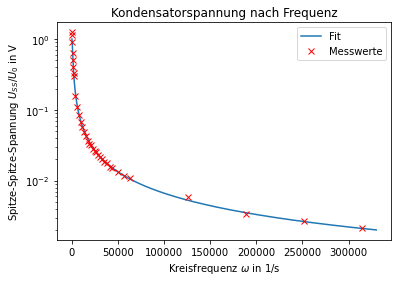

In [223]:
f1r=np.genfromtxt('spannungfrequenz.dat', usecols=(0))
USS1r=np.genfromtxt('spannungfrequenz.dat', usecols=(1))
U0=12
USS1=USS1r/(U0)
omega1=2*const.pi*f1r
#Fit
    
def A(omega1,R):
   return (1/(np.sqrt(1+(omega1**2*R**2))))

a=np.linspace(0,330000,33000)
params, covariance_matrix = curve_fit(A,  omega1,USS1,p0=(0.1),bounds=(0, 100))
print(np.diag(covariance_matrix))
uncertainties = np.sqrt(np.diag(covariance_matrix))

for name, value, uncertainty in zip('R', params, uncertainties): 
   print(f'{name} = {value:8.20f} ± {uncertainty:.20f}')
#Plot


#plt.plot(omega1,USS1,'r-')
plt.plot(a, A(a, *params ),label='Fit')
plt.plot(omega1,USS1,'rx',label='Messwerte')
plt.yscale('log')
#plt.xscale('log')
plt.title('Kondensatorspannung nach Frequenz')
plt.xlabel('Kreisfrequenz $\omega$ in 1/s')
plt.ylabel('Spitze-Spitze-Spannung $U_{SS}/U_{0}$ in V')
plt.legend(loc='best')
plt.savefig('Kondensatorspannung.pdf')

a = 3.45256663121906948177 ± 0.22402696324109389048
b = 0.01437333954596387194 ± 0.00581189725155656107
<ipython-input-274-5415a4c1779d>:22: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(line,2*const.pi*(line/line),label='2$\pi$')


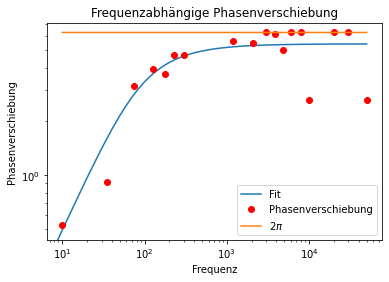

In [274]:
f2r=np.genfromtxt('verschiebung.dat', usecols=(0))
dtr=np.genfromtxt('verschiebung.dat', usecols=(1))
T=1/f2r
b=const.c/(f2r*1249135239.85)
#*1249135239.85)
#Fit
def phase(f2r,c,d):
   return (c*np.arctan(d*f2r))
params2, covariance_matrix = curve_fit(phase,  f2r,phi,p0=(4,0.01))
uncertainties2 = np.sqrt(np.diag(covariance_matrix))

for name, value, uncertainty in zip('ab', params2, uncertainties2): 
   print(f'{name} = {value:8.20f} ± {uncertainty:.20f}')


line=np.linspace(0,50000,5000)
phi=(dtr/b)*2*const.pi
#plt.plot(line,phase(line,4,0.01))
plt.plot(line,phase(line,*params2),label='Fit')
plt.plot(f2r,phi,'ro',label='Phasenverschiebung')
#plt.plot(f2r,phi,'r-')
plt.plot(line,2*const.pi*(line/line),label='2$\pi$')
plt.xscale("log")
plt.yscale("log")
plt.ylabel("Phasenverschiebung")
plt.xlabel("Frequenz")
plt.title("Frequenzabhängige Phasenverschiebung")
plt.legend(loc='best')
plt.savefig("verschiebung.pdf")

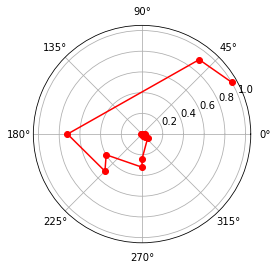

In [278]:
U10=[15, 13.6, 10.8, 7.6, 6, 4.8, 3.6, 1, 0.58, 0.4, 0.32, 0.26, 0.21, 0.16, 0.13, 0.07, 0.04, 0.026]
U10=[k* (1/15) for k in U10]
ii=0
phi2=X*len(phi)
while ii<len(phi):
    phi2[ii]=180/const.pi*phi[ii]
    ii=ii+1
plt.polar(phi,U10,'ro')
plt.polar(phi,U10,'r-')
plt.savefig('polar.pdf')